In [1]:
import os.path as path
import raw_data_preprocessing as rdp
import warnings

warnings.filterwarnings('ignore')

data_folder_loc = '/dfs6/pub/yif12'
file_name = 'saved_data/April/kmeans_binary2/'
data_path = path.join(data_folder_loc, file_name)

import classification as clf
X, Y, feature_names, x_test, y_test = clf.read_inputs(data_path,['train_x.array','train_y.array','feature_names.list', 'test_x.array', 'test_y.array'])
print('The input and output shape: {} and {}'.format(X.shape, Y.shape))

The input and output shape: (684, 24) and (684,)


In [2]:
orig_len = 342

In [3]:
# 1) exlude game information
X = X[:,5:]
x_test = x_test[:,5:]
feature_names = feature_names[5:]

In [4]:
classes = ['long','short']
classify_test = clf.ClassificationProcessor(X, Y, orig_len, feature_names, classes)

In [5]:
x_selected_train, x_selected_test, selected_feature_names = classify_test.feature_selection(x_test)

In [6]:
selected_feature_names

array(['MR_accpre', 'IC_Zreverse_pre', 'NT_Zpre',
       'NEOFFIEmotionalstability', 'NEOFFIIntellectorOpenness',
       'VGQHoursCategorySumPastYear_Z', 'Psychohealth'], dtype=object)

The confusion matrix of Decision Tree is: [[302  40]
 [ 12  20]]
Decision Tree Accuracy: 0.899 (0.027)


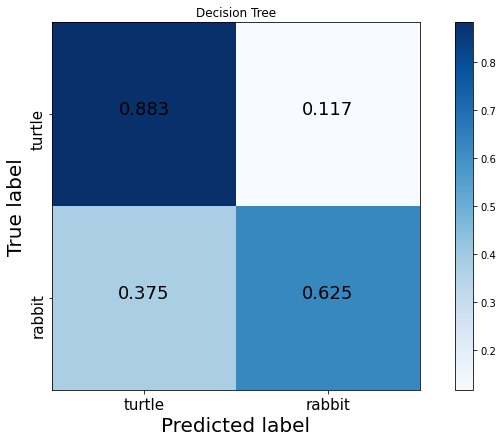

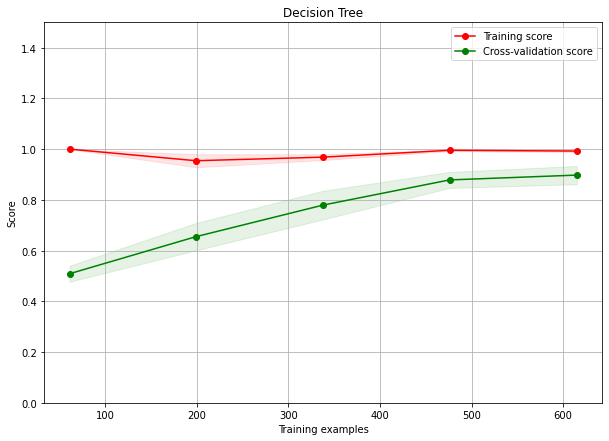

The confusion matrix of Random Forest is: [[332  10]
 [  8  24]]
Random Forest Accuracy: 0.968 (0.030)


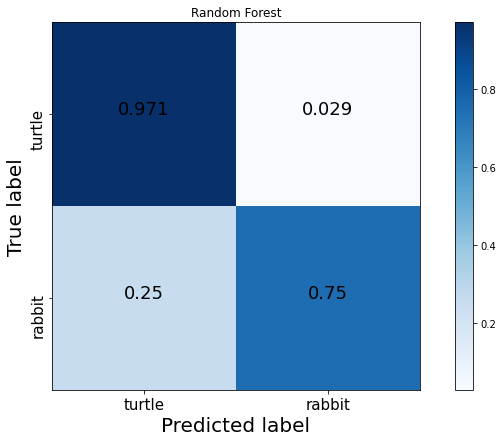

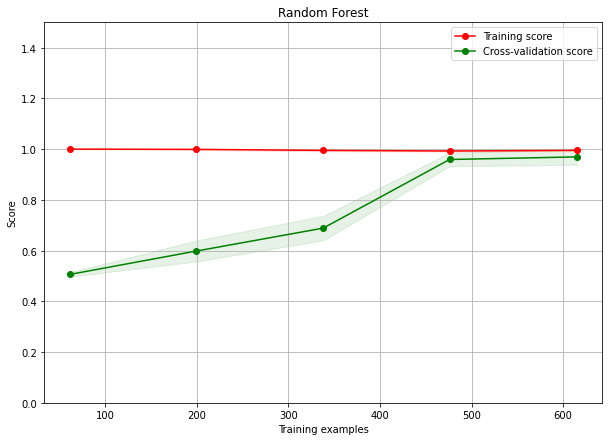

The confusion matrix of MLP is: [[301  41]
 [  4  28]]
MLP Accuracy: 0.929 (0.040)


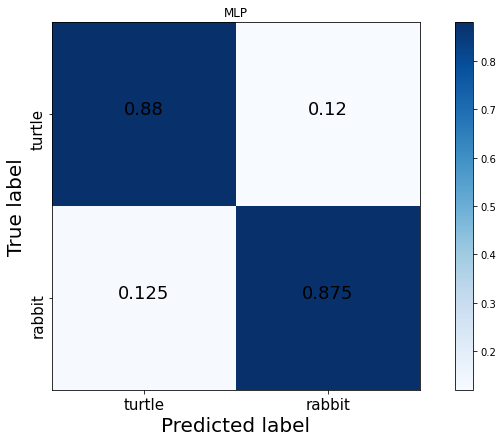

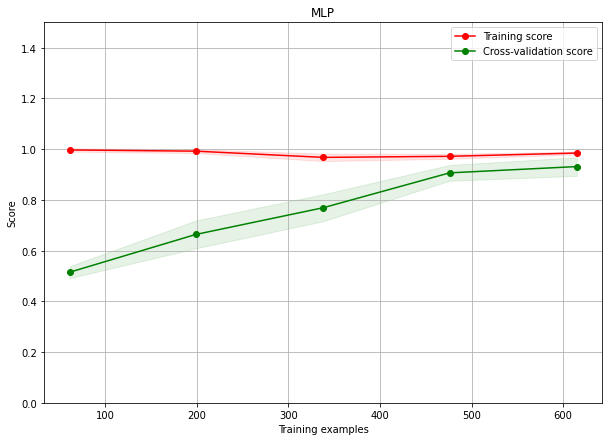

The confusion matrix of Linear SVM is: [[196 146]
 [  9  23]]
Linear SVM Accuracy: 0.637 (0.059)


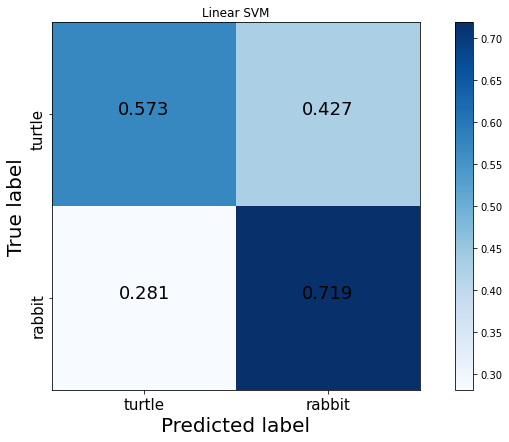

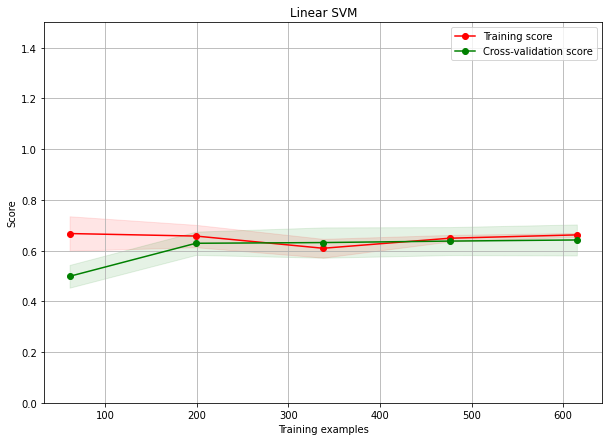

The confusion matrix of RBF SVM is: [[284  58]
 [  3  29]]
RBF SVM Accuracy: 0.902 (0.050)


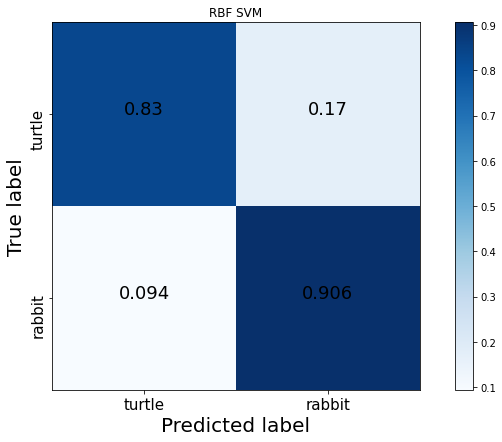

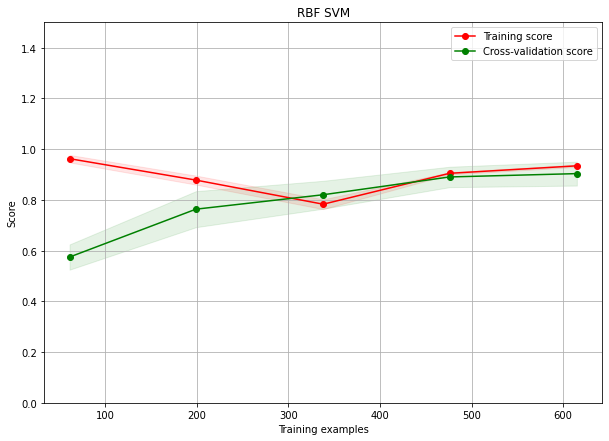

The confusion matrix of GDBT is: [[326  16]
 [ 10  22]]
GDBT Accuracy: 0.958 (0.028)


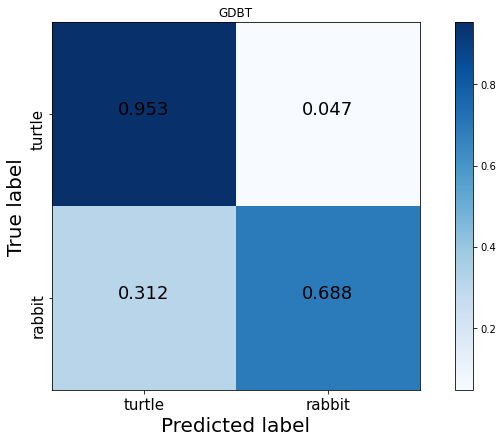

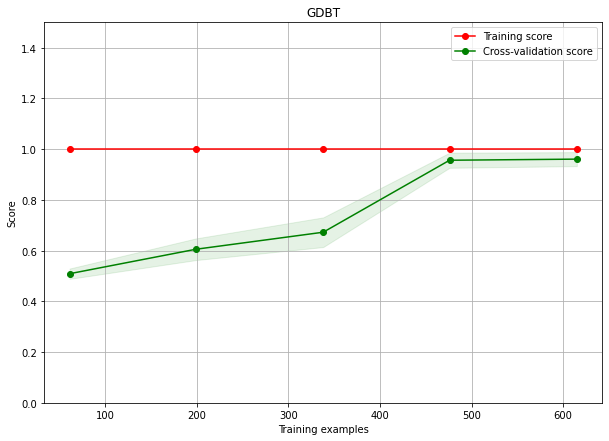

In [7]:
selected_clf = clf.ClassificationProcessor(x_selected_train, Y, orig_len, selected_feature_names, classes)

In [ ]:
selected_clf.Y

In [17]:
selected_clf.model_selection(7)

Features: 150/351IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=50.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Final model

In [5]:
from sklearn.svm import SVC, LinearSVC

c = [0.001, 0.01, 0.1,1]
tol = [1e-3, 1e-2, 1e-4]
shrinking = [False, True]
gamma = ["scale", "auto"]
for i in c:
    final_model = SVC(
        kernel="rbf",
        C=i,
        tol=0.001,
        gamma="scale",
        class_weight='balanced',
        random_state=0,
        probability=True,
    )
    selected_clf.final_model(final_model, x_selected_test, y_test)

[[23 18]
 [26 27]]
[[20 21]
 [17 36]]
[[21 20]
 [22 31]]
[[24 17]
 [29 24]]
[[26 15]
 [33 20]]
[[23 18]
 [17 36]]


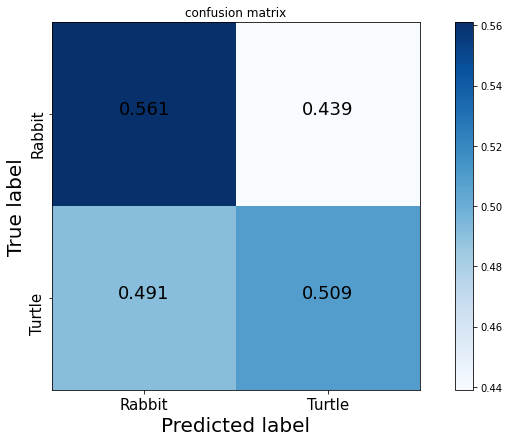

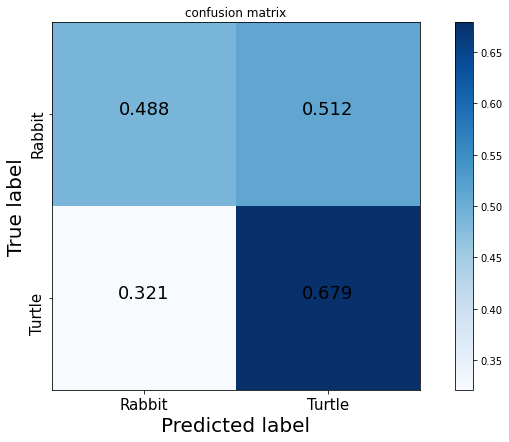

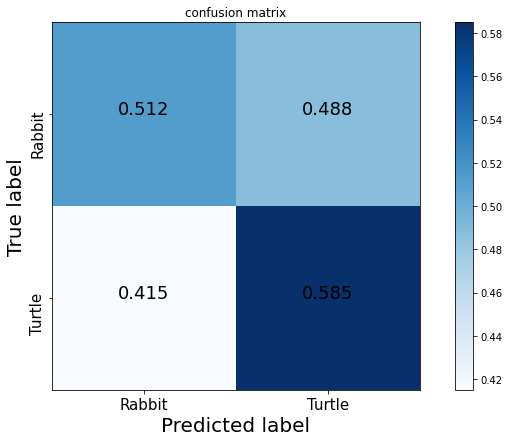

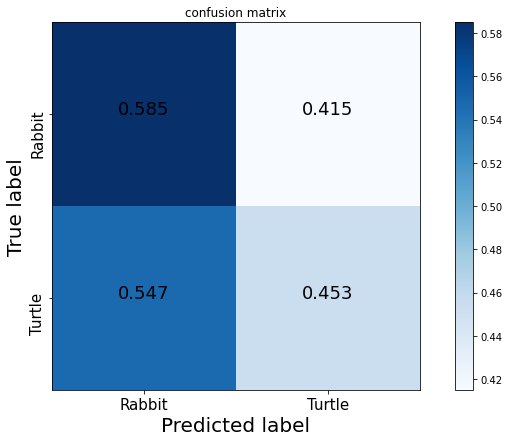

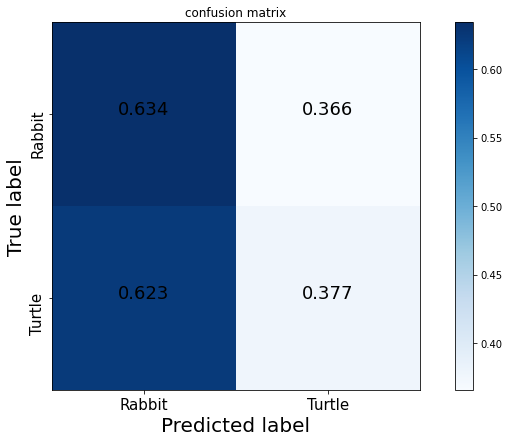

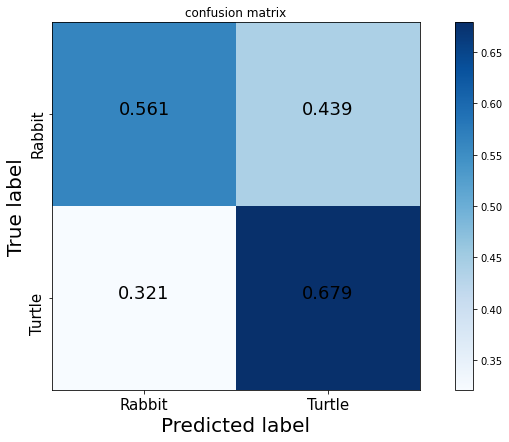

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [300, 150, 100, 50]
criterion = ["gini", "entropy"]
max_depth = [3, 5, 7, None]
min_samples_split = [2, 3,4,5, 10]
min_samples_leaf = [2, 3,4,5, 10]
max_features = ["sqrt", "auto", "log2"]
for i in n_estimators:
    final_model = RandomForestClassifier(
        n_estimators=100,
        criterion="gini",
        max_depth=None,
        min_samples_split=4,
        min_samples_leaf=2,
        max_features="auto",
        class_weight="balanced",
        random_state=0,
    )
    selected_clf.final_model(final_model, x_selected_test, y_test)

In [ ]:
from sklearn.svm import SVC, LinearSVC

final_model = SVC(
    kernel="rbf",
    C=1,
    tol=0.001,
    gamma="scale",
    class_weight="balanced",
    random_state=0,
    probability=True,
)
final_model.fit(x_selected_train, Y)
y_pred = final_model.predict(x_selected_test)
y_proba = final_model.predict_proba(x_selected_test)

In [8]:
selected_clf.shap_tree_cross('Random Forest',data_path)

[  0   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39
  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  86  88  89  90  91  92  93  94  95  96  97  98
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 121 122 123 124 126 127 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 172 173 174 175 176
 177 178 179 180 181 182 183 184 186 187 188 189 190 192 193 194 195 197
 198 199 201 202 203 204 206 207 208 209 210 211 213 214 215 216 217 219
 221 222 223 224 225 226 227 229 231 233 234 235 236 237 238 239 240 241
 242 244 245 246 247 248 251 252 253 254 255 256 257 258 259 260 261 262
 263 265 266 267 268 269 270 271 272 273 274 275 27

In [20]:
selected_clf.X.shape

(356, 7)

shap

In [9]:
shap_all, expected_shap = clf.read_inputs(data_path,['shap_values.data','shap_expected.data'])
# selected_clf.shap_visualize(shap_all, expected_shap, selected_feature_names)

In [ ]:
shap_all[9][0]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5c9e1ba2-0cb9-40ed-a01b-b56de82eb464' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>